In [ ]:
!pip install contractions -q
!pip install textacy -q
!pip install pyLDAvis

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import re
from nltk.stem import WordNetLemmatizer
import numpy as np
import contractions
import textacy
from textacy import preprocessing
import pyLDAvis
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')
nltk.download('stopwords')
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [ ]:
def f_preprocess_tweets_03Mar23_v2( text):
  text = text.replace( '\n', '' )
  text = contractions.fix( text )
  text = preprocessing.normalize.unicode(text )
  text = preprocessing.replace.hashtags( text, "")
  text = re.sub( r'http\S+', '', text )
  text = re.sub( r'#+', '', text )
  text = preprocessing.remove.accents( text )
  text = preprocessing.remove.brackets( text )
  text = preprocessing.remove.html_tags( text )
  text = preprocessing.replace.currency_symbols( text, "")
  text = preprocessing.replace.emails( text, "")
  text = preprocessing.replace.emojis( text, "")
  text = preprocessing.replace.numbers( text, "")
  text = preprocessing.replace.phone_numbers( text, "")
  text = preprocessing.replace.urls( text, "")
  text = preprocessing.replace.user_handles( text, "")
  text = preprocessing.remove.punctuation( text )
  text = preprocessing.normalize.whitespace( text )
  text = text.lower()
  return text

In [ ]:
## Setup TFIDF vectorizer
WordNet_lemmatizer = WordNetLemmatizer().lemmatize

def f_WordNetLemmatizer_tokenize(document):
    tokens = [WordNet_lemmatizer(w) for w in document.split() if len(w) > 3 and w.isalpha()]
    return tokens


In [ ]:
fileIn = "/content/fifa_world_cup_2022_tweets.xlsx"

df = pd.read_excel( fileIn, index_col=None )

df.keys()

In [ ]:
df["text"] = df["Tweet"].apply( lambda x: f_preprocess_tweets_03Mar23_v2(x) )

In [ ]:
sid = SentimentIntensityAnalyzer()
pos_comments = []
neg_comments = []
for comment in df["text"]:
    scores = sid.polarity_scores(comment)
    if scores['compound'] > 0.2:
        pos_comments.append(comment)
    elif scores['compound'] < -0.2:
        neg_comments.append(comment)

# Positive Comments

In [ ]:
text_in = pos_comments

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['le'] not in stop_words.
  warnings.warn(


[('amazing', 62.83231339670655), ('launch', 4.508681792012894), ('video', 14.460066500370065), ('face', 10.321248476701737), ('canada', 10.626036349168713), ('national', 26.773344261998947), ('team', 156.66637728639688), ('changed', 4.367937011260064), ('world', 379.4783536326733), ('entry', 6.1294353983691705)]
[('amazing launch', 0.2576638765759307), ('launch video', 0.2576638765759307), ('video face', 0.2576638765759307), ('face canada', 0.2576638765759307), ('canada national', 0.2576638765759307), ('national team', 10.630607992893529), ('team changed', 0.2576638765759307), ('changed world', 0.2576638765759307), ('world entry', 0.2576638765759307), ('entry wait', 0.2576638765759307)]
[('amazing launch video', 0.25329056878505346), ('launch video face', 0.25329056878505346), ('video face canada', 0.25329056878505346), ('face canada national', 0.25329056878505346), ('canada national team', 0.25329056878505346), ('national team changed', 0.25329056878505346), ('team changed world', 0.2

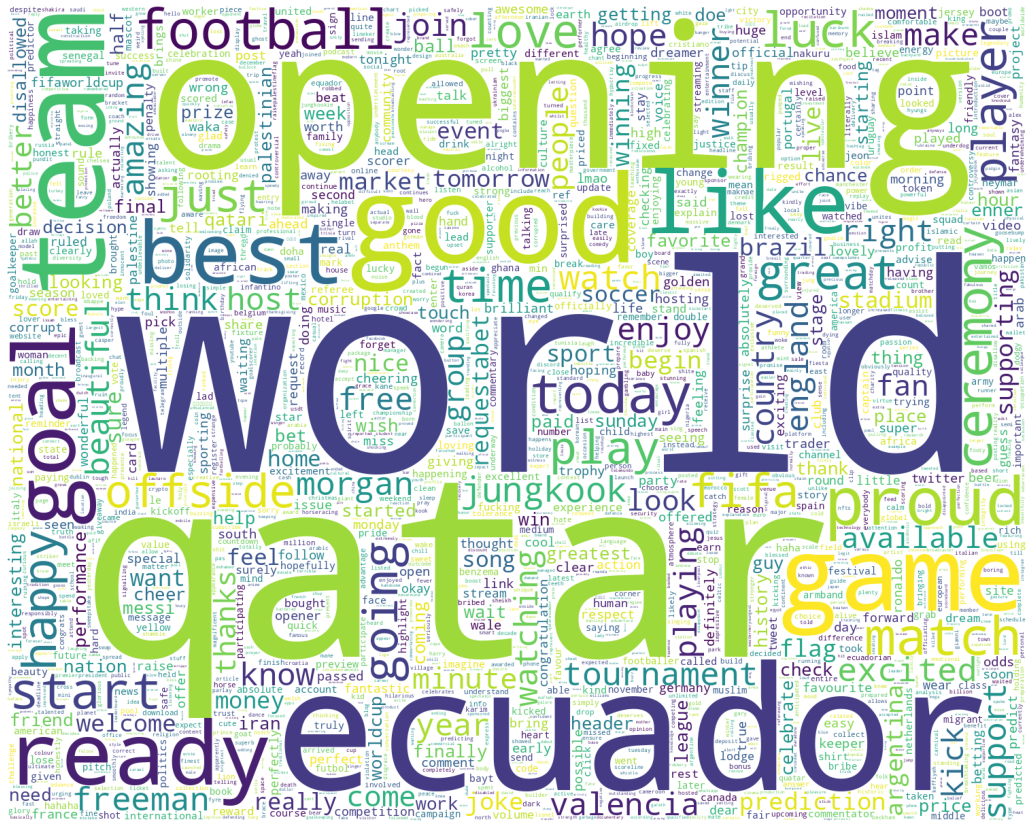

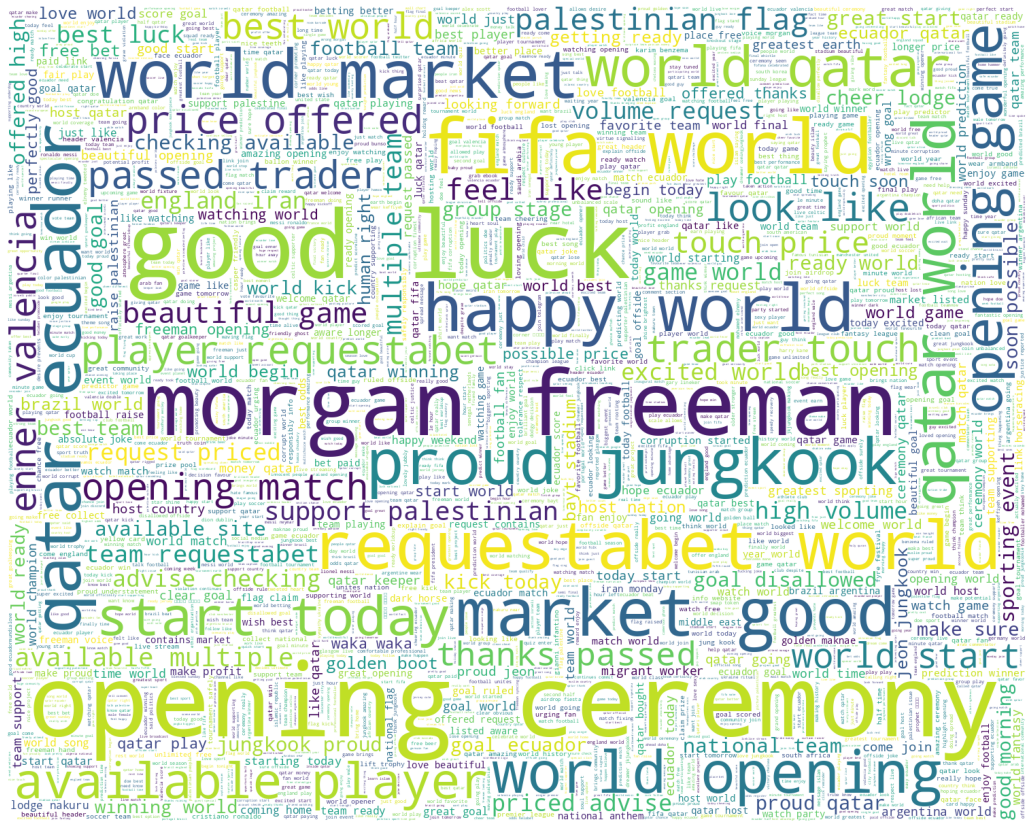

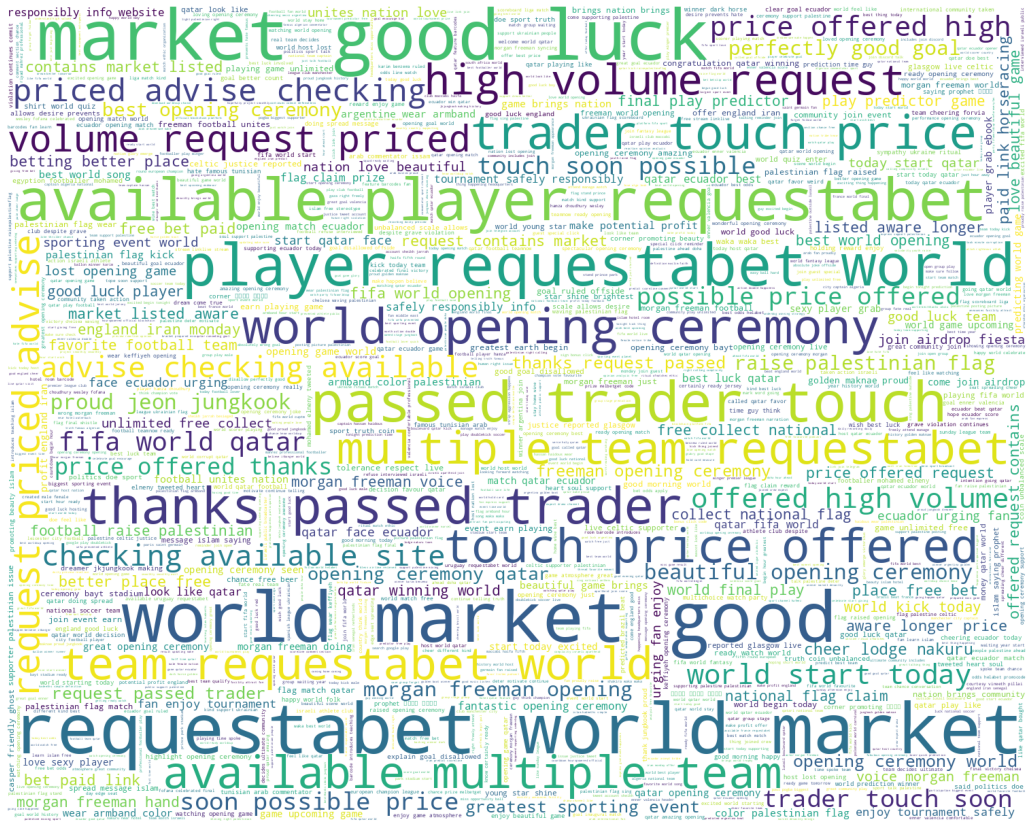

In [ ]:
# Unigram

vectorizer = TfidfVectorizer( tokenizer=f_WordNetLemmatizer_tokenize, ngram_range = ((1,1)), stop_words="english" )
tfm = vectorizer.fit_transform( text_in )
tfidf_weights_unigram_pos = [(word, tfm.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items()]

print( tfidf_weights_unigram_pos[0:10] )

w_unigram_pos = WordCloud(width=1500, height=1200, mode='RGBA', background_color='white', max_words=2000).fit_words(dict(tfidf_weights_unigram_pos))

plt.figure(figsize=(20,15))
plt.imshow(w_unigram_pos)
plt.axis('off')
plt.savefig('unigram - positive.png', dpi=400)


# Bigram

vectorizer = TfidfVectorizer( tokenizer=f_WordNetLemmatizer_tokenize, ngram_range = ((2,2)), stop_words="english" )
tfm = vectorizer.fit_transform( text_in )
tfidf_weights_bigram_pos = [(word, tfm.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items()]

print( tfidf_weights_bigram_pos[0:10] )

w_bigram_pos = WordCloud(width=1500, height=1200, mode='RGBA', background_color='white', max_words=2000).fit_words(dict(tfidf_weights_bigram_pos))

plt.figure(figsize=(20,15))
plt.imshow(w_bigram_pos)
plt.axis('off')
plt.savefig('bigram - positive.png', dpi=400)


# Trigram

vectorizer = TfidfVectorizer( tokenizer=f_WordNetLemmatizer_tokenize, ngram_range = ((3,3)), stop_words="english" )
tfm = vectorizer.fit_transform( text_in )
tfidf_weights_trigram_pos = [(word, tfm.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items()]

print( tfidf_weights_trigram_pos[0:10] )

w_trigram_pos = WordCloud(width=1500, height=1200, mode='RGBA', background_color='white', max_words=2000).fit_words(dict(tfidf_weights_trigram_pos))

plt.figure(figsize=(20,15))
plt.imshow(w_trigram_pos)
plt.axis('off')
plt.savefig('trigram - positive.png', dpi=400)


# Negative Comments

In [ ]:
text_in = neg_comments

[('world', 123.17145051446894), ('start', 37.93707119186593), ('qatar', 147.1927366849177), ('black', 4.5278028379847814), ('awareness', 0.5421367807027884), ('brazil', 5.406370293579252), ('despite', 2.5418106804962086), ('atrocity', 0.6496770276881845), ('linked', 0.9004820320695714), ('year', 20.661031544760846)]
[('world start', 5.2217430637628635), ('start qatar', 1.6178021209755473), ('qatar black', 0.23465613694735388), ('black awareness', 0.23465613694735388), ('awareness brazil', 0.23465613694735388), ('brazil despite', 0.23465613694735388), ('despite atrocity', 0.23465613694735388), ('atrocity linked', 0.23465613694735388), ('linked year', 0.23465613694735388), ('year host', 0.23465613694735388)]
[('world start qatar', 0.23570226039551578), ('start qatar black', 0.23570226039551578), ('qatar black awareness', 0.23570226039551578), ('black awareness brazil', 0.23570226039551578), ('awareness brazil despite', 0.23570226039551578), ('brazil despite atrocity', 0.23570226039551578

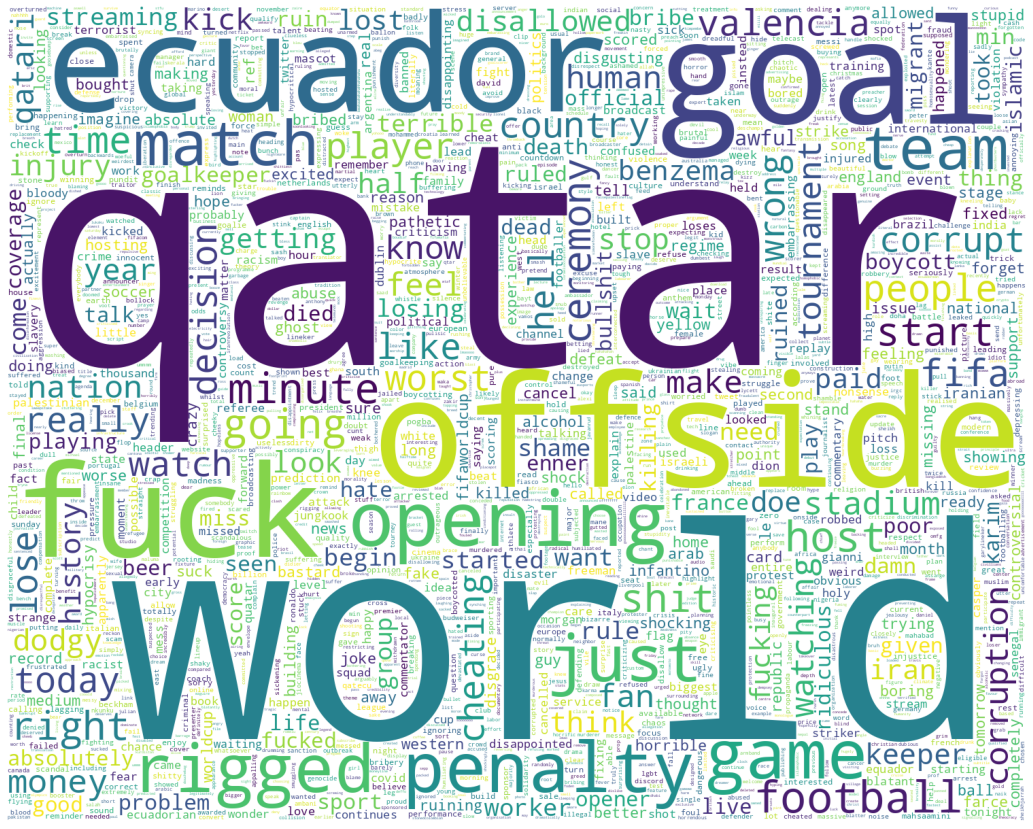

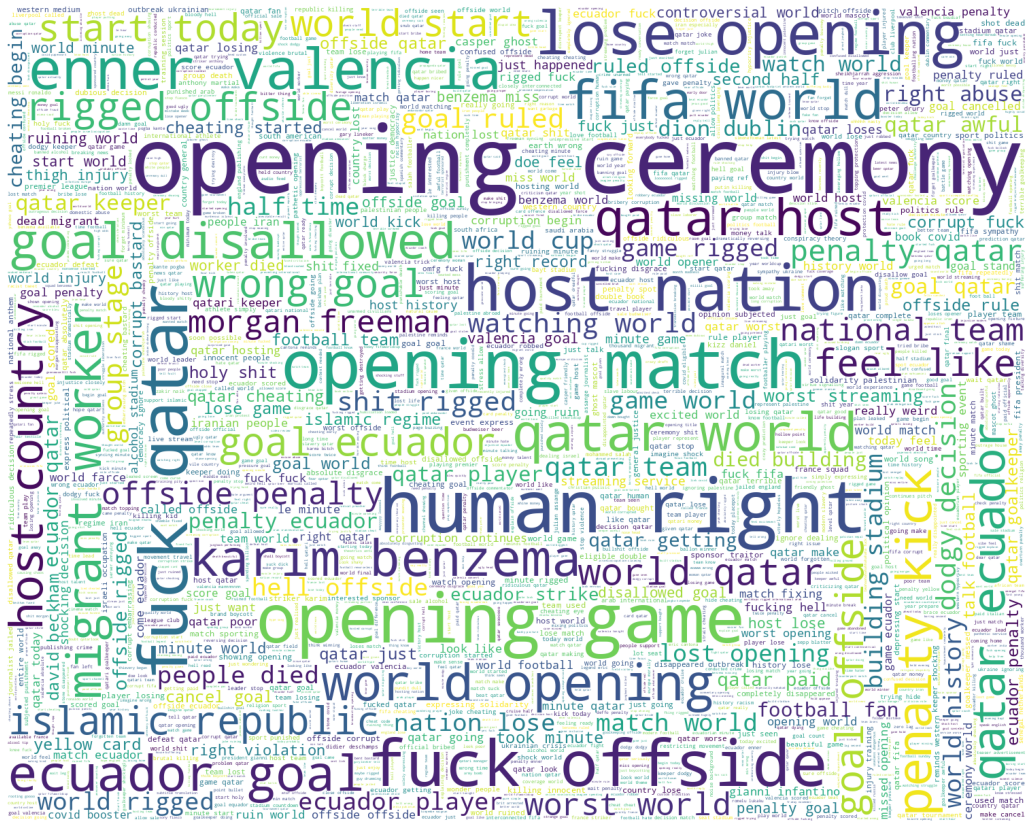

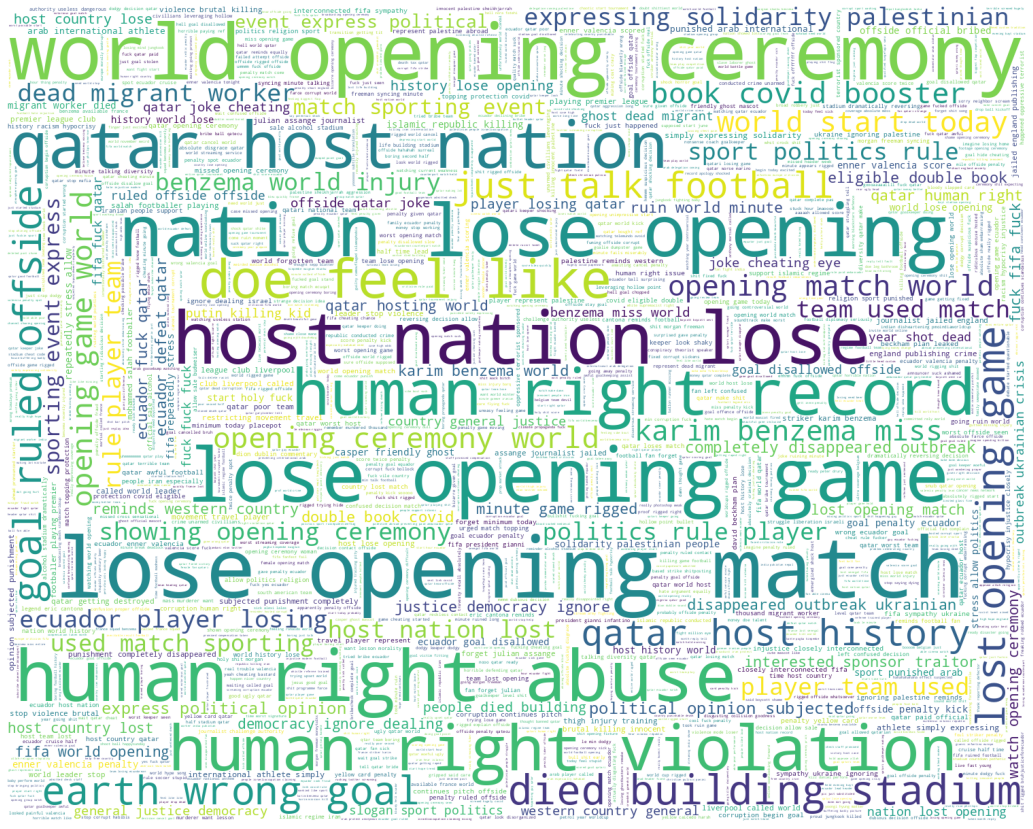

In [ ]:
# Unigram

vectorizer = TfidfVectorizer( tokenizer=f_WordNetLemmatizer_tokenize, ngram_range = ((1,1)), stop_words="english" )
tfm = vectorizer.fit_transform( text_in )
tfidf_weights_unigram_neg = [(word, tfm.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items()]

print( tfidf_weights_unigram_neg[0:10] )

w_unigram_neg = WordCloud(width=1500, height=1200, mode='RGBA', background_color='white', max_words=2000).fit_words(dict(tfidf_weights_unigram_neg))

plt.figure(figsize=(20,15))
plt.imshow(w_unigram_neg)
plt.axis('off')
plt.savefig('unigram - negitive.png', dpi=400)


# Bigram

vectorizer = TfidfVectorizer( tokenizer=f_WordNetLemmatizer_tokenize, ngram_range = ((2,2)), stop_words="english" )
tfm = vectorizer.fit_transform( text_in )
tfidf_weights_bigram_neg = [(word, tfm.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items()]

print( tfidf_weights_bigram_neg[0:10] )

w_bigram_neg = WordCloud(width=1500, height=1200, mode='RGBA', background_color='white', max_words=2000).fit_words(dict(tfidf_weights_bigram_neg))

plt.figure(figsize=(20,15))
plt.imshow(w_bigram_neg)
plt.axis('off')
plt.savefig('bigram - negitive.png', dpi=400)


# Trigram

vectorizer = TfidfVectorizer( tokenizer=f_WordNetLemmatizer_tokenize, ngram_range = ((3,3)), stop_words="english" )
tfm = vectorizer.fit_transform( text_in )
tfidf_weights_trigram_neg = [(word, tfm.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items()]

print( tfidf_weights_trigram_neg[0:10] )

w_trigram_neg = WordCloud(width=1500, height=1200, mode='RGBA', background_color='white', max_words=2000).fit_words(dict(tfidf_weights_trigram_neg))

plt.figure(figsize=(20,15))
plt.imshow(w_trigram_neg)
plt.axis('off')
plt.savefig('trigram - negitive.png', dpi=400)
